<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Ecuaci%C3%B3n_hiperbolica_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO EXPLÍCITO. ECUACIÓN DE ONDA.

##PLANTEAMIENTO DEL PROBLEMA

El objetivo es aproximar la solución de la ecuación de onda

$$\frac{∂^2u}{∂^2t}(x,t)-4\frac{∂^2u}{∂x^2}(x,t)=0 \quad 0<x<1, \quad 0<t $$

Sujeto a las condiciones de frontera
$$u(0,t)=0, \qquad u(1,t)=0$$

y condición inicial
$$u(x,0)=\sin(\pi x), \quad 0 \le x\le 1$$

Usaremos el método de Richardson (diferencias regresivas), para ello consideraremos los valores:

$h=0.1 \quad k=0.05 \quad $

Compare los resultados con la solución exacta

$$u(x,0)=\sin(\pi x) \cos(2 \pi xt)$$








Considerando que partimos del problema híperbolico, donde esta ecuación corresponde a la ecuación de onda en su forma general.

$$ u_{tt}=α^2 u_{xx}$$

donde $c$  respresenta la velocidad de propagación de onda.

1. Calculare la constante $α$
  $$ \alpha^2=4 \to \qquad \alpha=\sqrt{4}=2$$

2. Calcular el parámetro de  λ
Es cual esta definido como la razon de:
$$λ=\frac{\alpha^2 k}{h^2}$$


  Sustituyendo los valores obtengo:

  $$λ=\frac{(2) (0.05)}{(0.1)^2} =1$$
  Este valor cumple exactamente la condición de estabilidad $\lambda \leq 1$ para el esquema explícito aplicado a la ecuación de onda.


3. Esquema explicito central en tiempo y el espacio

El método explícito de tres niveles para aproximar la solución se obtiene mediante:

$$u_{tt}(x_i,t_n)\approx \frac{u_i^{n+1}-2u_i^n+u_i^{n-1}}{k^2}$$


$$
u_{xx}(x_i,t_n)\approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{h^2}.
$$


Sustituyendo en la ecuación de onda y despejando $u_i^{n+1}$ se obtiene:

$$
u_i^{n+1}
=
2(1-\lambda^2)u_i^n
+
\lambda^2\left(u_{i+1}^n + u_{i-1}^n\right)
-
u_i^{n-1},
$$

con
$$
\lambda = \frac{\alpha k}{h}, \qquad \alpha=2.
$$


4. Forma matrcial


Sea el vector de incógnitas:
$$
\mathbf{u}^{n}=
\begin{bmatrix}
u_1^{n} \\
u_2^{n} \\
\vdots \\
u_{m-1}^{n}
\end{bmatrix},
\qquad
\mathbf{u}^{n-1}=
\begin{bmatrix}
u_1^{n-1} \\
u_2^{n-1} \\
\vdots \\
u_{m-1}^{n-1}
\end{bmatrix}.
$$


Entonces, el método explícito puede escribirse en forma matricial como:
$$
\mathbf{u}^{n+1}
=
A\,\mathbf{u}^{n}
-
\mathbf{u}^{n-1},
$$
donde la matriz $A$ es tridiagonal y está dada por:
$$
A=
\begin{bmatrix}
2(1-\lambda^2) & \lambda^2 & 0 & \cdots & 0\\
\lambda^2 & 2(1-\lambda^2) & \lambda^2 & \cdots & 0\\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & \cdots & \lambda^2 & 2(1-\lambda^2) & \lambda^2\\
0 & 0 & \cdots & \lambda^2 & 2(1-\lambda^2)
\end{bmatrix}.
$$


Esta representación matricial resume la estructura del método explícito y su dependencia de los valores en los tiempos $n$ y $n-1$, característica fundamental de la ecuación de onda.








In [1]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap
from tabulate import tabulate #Libreria para crear tablas


Defino la función que corresponde a la condición inicial
$$u(x,0)=\sin(\pi x)$$

In [2]:
def f(x):
    return np.sin(np.pi*x)

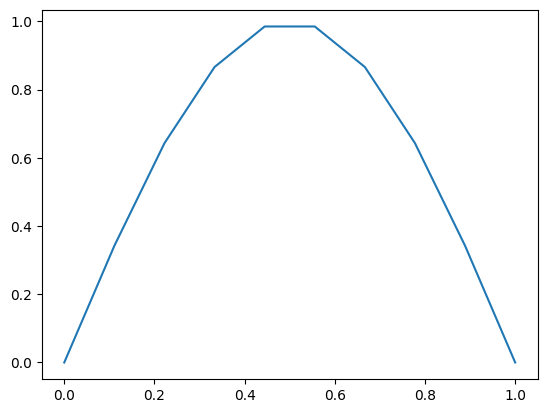

In [3]:
x=np.linspace(0,1,10)
plt.plot(x,f(x))

Definimos a la matriz A de una manera más simple, es decir sin necesidad de escibirla toda manualmente

In [4]:
def tridiagonal(n, a, b):
    return sp.Matrix([
        [a if i == j else b if abs(i - j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])

In [5]:
r=1   #es al que nombramos lambda

In [7]:
A=tridiagonal(9,2-(2*r),r)
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

Definimos el vector $b$

In [9]:
b=sp.Matrix([f(0.1*(i+1))for i in range (9)])
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [11]:
# ================================================
#     BLOQUE: Definición de parámetros y malla
# ================================================

import numpy as np

# Parámetros del problema
h = 0.1                # paso espacial
k = 0.05               # paso temporal
alpha = 2              # velocidad de la onda
lam = alpha * k / h    # parámetro lambda

print("Parámetros definidos correctamente.")
print(f"h = {h},   k = {k},   alpha = {alpha},   lambda = {lam}")



Parámetros definidos correctamente.
h = 0.1,   k = 0.05,   alpha = 2,   lambda = 1.0


El número total de puntos espaciales es:

$$
x_i = ih, \qquad i = 0,1,\dots,10.
$$

El tiempo se simula hasta un valor máximo $T=0.50$, lo cual genera:

$$
t_n = nk, \qquad n = 0,1,\dots,10.
$$

In [12]:
# ==========================================================
#   DEFINICIÓN DE LA MALLA ESPACIAL Y TEMPORAL
# ==========================================================

# Malla espacial: 0, 0.1, ..., 1
x = np.linspace(0, 1, int(1/h) + 1)
Nx = len(x)

# Malla temporal: 0, 0.05, ..., 0.50
T = 0.50
t = np.linspace(0, T, int(T/k) + 1)
Nt = len(t)

print(f"Nodos espaciales: {Nx}")
print(f"Pasos de tiempo: {Nt}")

Nodos espaciales: 11
Pasos de tiempo: 11


El esquema explícito requiere conocer los valores en los tiempos $t_0$ y $t_1$.  

Usando el desarrollo central:

$$
u_i^1
=
u_i^0
+
k\,u_t(x_i,0)
+
\frac{k^2}{2}\,4u_{xx}(x_i,0),
$$
y como $u_t(x,0)=0$, solo queda:

$$
u_i^1
=
u_i^0
+
2k^2\,\frac{u_{i+1}^0 - 2u_i^0 + u_{i-1}^0}{h^2}.
$$


In [13]:
# ==========================================================
#   CONDICIONES INICIALES
# ==========================================================

# u(x,0) = sin(pi x)
def u0(x):
    return np.sin(np.pi * x)

# u_t(x,0) = 0
def ut0(x):
    return 0.0   # NO depende de x

# Solución exacta (para ejercicios 2 y 3)
def u_exact(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

In [14]:
# ==========================================================
#   MATRIZ U: almacenará la solución numérica
#   Filas → tiempo t_n
#   Columnas → posición x_i
# ==========================================================

U = np.zeros((Nt, Nx))

# t = 0  → condición inicial directa
U[0, :] = u0(x)


In [15]:
# ==========================================================
# Cálculo de u^1 (t = k)
# Usamos el desarrollo central especial para el primer paso
# ==========================================================

# Para los nodos interiores
for i in range(1, Nx - 1):
    U[1, i] = (
        U[0, i]
        + lam**2 * 0.5 * (U[0, i+1] - 2*U[0, i] + U[0, i-1])
    )

# Condiciones de frontera
U[1, 0]  = 0.0
U[1, -1] = 0.0

print("Malla construida correctamente y condiciones iniciales aplicadas.")

Malla construida correctamente y condiciones iniciales aplicadas.


Una vez obtenidos los valores en los tiempos \(t_0\) y \(t_1\), el método explícito
de tres niveles permite calcular la solución en tiempos posteriores mediante:

$$
u_i^{n+1}
=
2(1 - \lambda^2)\,u_i^n
+
\lambda^2\left(u_{i+1}^n + u_{i-1}^n\right)
-
u_i^{n-1},
$$

donde:

$$
\lambda = \frac{\alpha k}{h}, \qquad \alpha = 2.
$$

En este problema \(\lambda = 1\), por lo cual el esquema toma la forma simplificada:

$$
u_i^{n+1} = u_{i+1}^n - 2u_i^n + u_{i-1}^n + u_i^{n-1}.
$$

Este esquema se aplica únicamente a los nodos interiores  
$i = 1,2,\ldots,N_x -2$, respetando las condiciones de frontera homogéneas:

$
u_0^n = u_{N_x-1}^n = 0.
$

A continuación se presenta la implementación del método explícito utilizando la
malla previamente construida.

In [17]:
# ==========================================================
#      MÉTODO EXPLÍCITO PARA LA ECUACIÓN DE ONDA
# ==========================================================

# Recorremos los tiempos n = 1, 2, ..., Nt-2
for n in range(1, Nt - 1):

    # Para nodos interiores i = 1, ..., Nx-2
    for i in range(1, Nx - 1):

        U[n+1, i] = (
            2*(1 - lam**2)*U[n, i]           # término central
            + lam**2 * (U[n, i+1] + U[n, i-1])  # dependencias espaciales
            - U[n-1, i]                      # nivel temporal anterior
        )

    # Condiciones de frontera homogéneas
    U[n+1, 0]  = 0.0
    U[n+1, -1] = 0.0

print("Método explícito aplicado correctamente.")


Método explícito aplicado correctamente.


**EJERCICIO 1** Generar las gráficas 2D y 3D de la solución hasta $t=0.50$

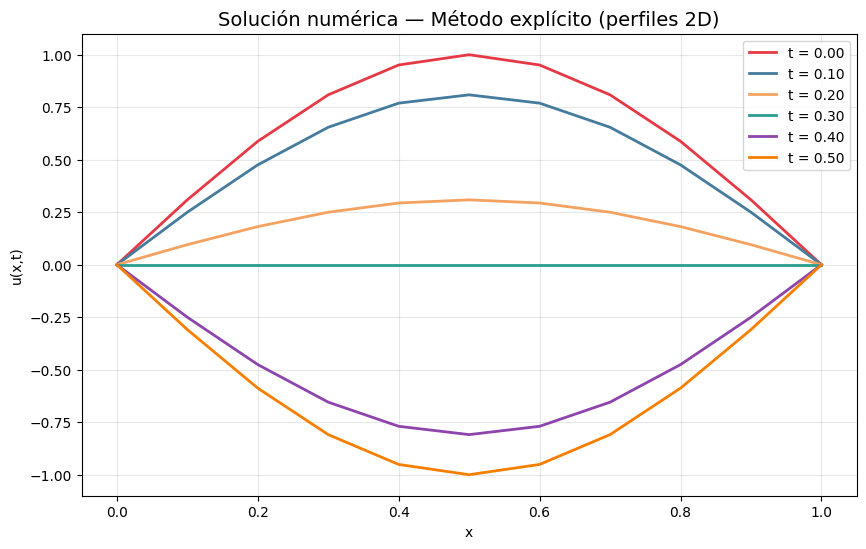

In [19]:
# ==========================================================
# Ejercicio 1: Gráficas 2D con colores personalizados
# ==========================================================

import matplotlib.pyplot as plt

# Paleta completamente diferente al ejemplo que enviaste
colores = ["#E63946", "#457B9D", "#F4A261", "#2A9D8F", "#8E44AD", "#F77F00"]

tiempos_interes = [0, 0.10, 0.20, 0.30, 0.40, 0.50]
indices_t = [int(tiempo/k) for tiempo in tiempos_interes]

plt.figure(figsize=(10,6))

for tiempo, idx, col in zip(tiempos_interes, indices_t, colores):
    plt.plot(x, U[idx, :], label=f"t = {tiempo:.2f}", color=col, linewidth=2)

plt.title("Solución numérica — Método explícito (perfiles 2D)", fontsize=14)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


permite observar el comportamiento de la onda en instantes discretos. Notemos que:

Verás que:

- $t=0$  arranca con $\sin(𝜋𝑥)$
- Para $t>0$ sube y baja y eso se debe al comporatmiento oscilatorio.

Además siempre con cero en los extremos (por las condiciones de frontera)

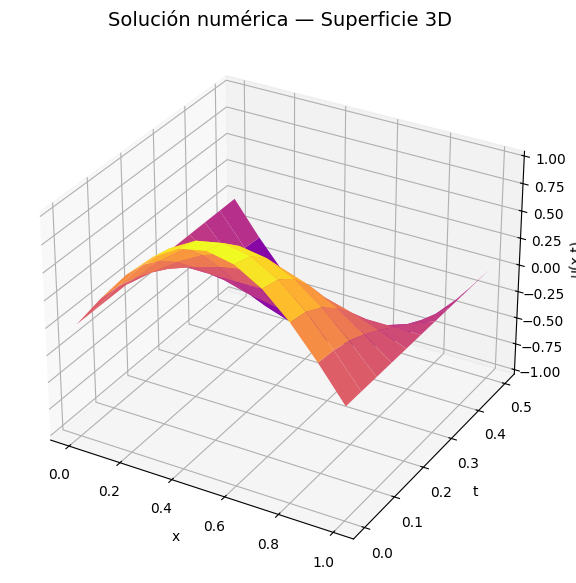

In [20]:
# ==========================================================
# Ejercicio 1: Gráfica 3D con nuevo estilo de color
# ==========================================================

from mpl_toolkits.mplot3d import Axes3D

X, Tmesh = np.meshgrid(x, t)

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

# Nuevo colormap: "plasma" (colores cálidos y vivos)
ax.plot_surface(X, Tmesh, U, cmap='plasma')

ax.set_title("Solución numérica — Superficie 3D", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")

plt.show()


Muestra la evolución completa de la solución en el plano
$(x,t)$, facilitando visualizar las oscilaciones características de la ecuación de onda.

Notemoa que hay simetria en $x=0.5$ y además ess periodica

**EJERCICIO 2** Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.